# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> `Santiago Aguirre Vera y Angel de la Mora` </font>
- <Strong> Fecha </Strong>: <font color="blue"> `27/03/23` </font>
- <Strong> Tarea: </Strong>  <font color="blue"> `Proyecto Final Regresión` </font>
___


### <font color= #2E9AFE> PROYECTO FINAL: Regresión </font>

### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido de regresión lineal/logística, redes neuronales, máquinas de vector soporte y modelos basados en árboles tanto para problemas de regresión como de clasificación. 

1. **Definición del problema**.

El problema a tratar con este dataset, será poder predecir el salario de una persona mediante 6 variables y nuestra variable de respuesta será el Salario.

La base datos fue sacada de kaggle(https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer?resource=download) y estos son nuestros datos.

Nuestras 6 variables a considerar serán:
 * Age (edad)
 * Gender (género)
 * Education Level (nivel de eduación)
 * Job Title (Título de carrera)
 * Year of Experience (años de experiencia)

Nuestra variable respuesta será:
 * Salary(salario)

Esta es la descripción de cada columna:
 
    
   * **Age**:This column represents the age of each employee in years. The values in this column are numeric.
   

   * **Gender**: This column contains the gender of each employee, which can be either male or female. The values in this column are     categorical.
   

   * **Education Level**: This column contains the educaional level of each employee, which can be high school, bachelor's degree,       master's degree, or PhD. The values in this column are categorical.


   * **Job Ttile**: This column contains the job title of each employee. The job titles can vary depending on the company and may       include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.


   * **Years of experience**: This column represents the number of years of work experience of each employee. The values in this         column are numeric.
   

   * **Salary**: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and     can vary depending on factors such as job title, years of experience, and education level.
 
Mediante la manipulación y exploración trataremos de encontrar que tipo de datos tenemos, si habrán nulos, outliers, etc. Y en caso de poder crear variables útiles, dejarlas en nuestro código para poder tener el mejor resultado posible y poder predecir el salario de las personas.


2. **Preparación de datos:** 
* (Datos nulos, datos sesgados, datos atípicos, datos imbalanceados, distribución de datos, etc.), así como el proceso y decisiones tomadas para procesar y limpiar estos datos.

In [1]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import requests, io
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor 
#Cross validation y train-test split
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold
#métricas de performance
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error, r2_score

In [2]:
#importar csv
df= pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
#tamaño de nuestro dataframe
df.shape

(375, 6)

In [4]:
#nuestros tipos de datos
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Dejaremos nuestros datos así sin cambiar tu tipo de dato.

In [5]:
#Revisamos si hay datos nulos
nulos = pd.DataFrame(df.isnull().sum(),columns=['Valores_Nulos'])
nulos

,Valores_Nulos
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


Al ser pocos nulos, procederemos a darles un drop  a estos datos nulos.

In [6]:
df.dropna(inplace=True)
#Revisamos si hay datos nulos
nulos = pd.DataFrame(df.isnull().sum(),columns=['Valores_Nulos'])
nulos

,Valores_Nulos
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [7]:
#separamos variables númericas
num= df[['Age', 'Years of Experience']]

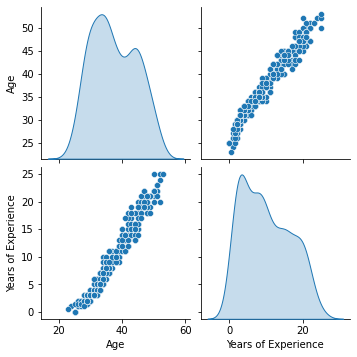

In [8]:
#gráficas de las variables númericas
sns.pairplot(num, diag_kind="kde")

Vemos que  nuestros datos numericos se comportan de manera lineal

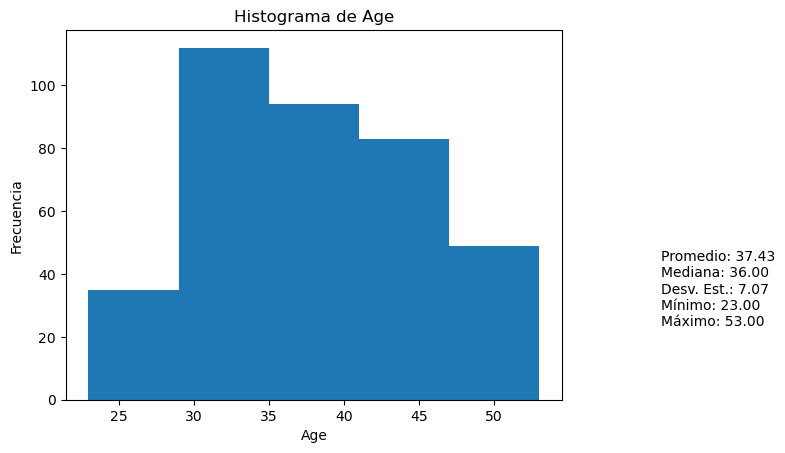

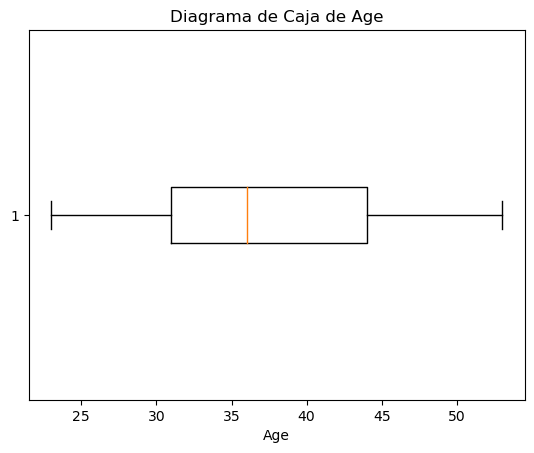

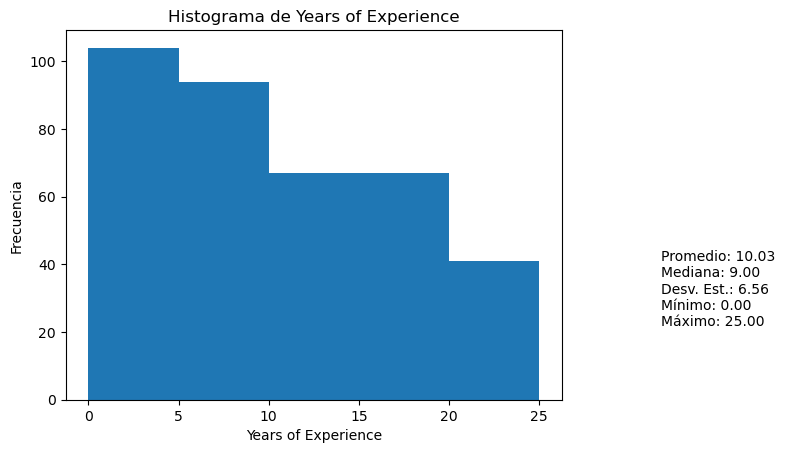

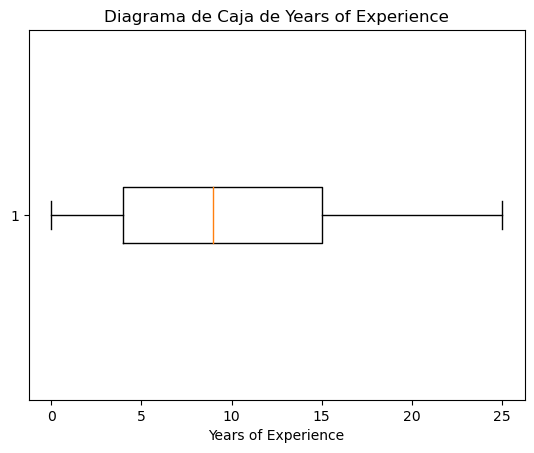

In [9]:
#gráficos variables númericos
for var in num:
    
    # Graficamos el histograma
    plt.hist(df[var], bins=5)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    
    # Calculamos algunas medidas estadísticas de la variable
    var_mean = df[var].mean()
    var_median = df[var].median()
    var_std = df[var].std()
    var_min = df[var].min()
    var_max = df[var].max()
    
    # Agregamos las medidas estadísticas al gráfico
    plt.text(1.20, 0.20, f"Promedio: {var_mean:.2f}\nMediana: {var_median:.2f}\nDesv. Est.: {var_std:.2f}\nMínimo: {var_min:.2f}\nMáximo: {var_max:.2f}",
             transform=plt.gca().transAxes)
    
    # Mostramos el gráfico
    plt.show()
    
    # Graficamos el diagrama de caja
    plt.boxplot(df[var], vert=False)
    plt.title(f'Diagrama de Caja de {var}')
    plt.xlabel(var)
    
    # Mostramos el gráfico
    plt.show()


**AGE** : Vemos que hay alta frecuencia entre la edad de 30-35, que es donde se concentran nuestros datos.

**Years of Experience** : Vemos que tenemos un promedio de 10 años y que realmente se concentran mucho de 10 años para abajo,suponemos que la edad nos da la respuesta que llevan poco trabajando.

Vemos un poco de sesgo, aunque lo dejaremos así ahorita.

No tenemos outliers que afecten nuestros datos.

In [10]:
#Calculando estadísticas básicas con los datos
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [11]:
# Calculo de la asimetria con pandas
skewness = round(num.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
Age,0.20,Symmetric distribution
Years of Experience,0.36,Symmetric distribution


Nuestros datos no tienen sesgo alto, entonces los outliers que llegue a haber, así se quedan.

In [12]:
#vemos si hay imbalanceo en nuestra variable de respuesta
df['Salary'].value_counts()

40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: Salary, dtype: int64

Quitamos el dato de 350.000,30000.00 y 75000.00 ya que está fuera del promedio.

In [13]:
df['Salary'].replace(350.00, np.nan, inplace=True)
df['Salary'].replace(30000.00, np.nan, inplace=True)
df['Salary'].replace(75000.00, np.nan, inplace=True) 
df['Salary'].value_counts()

40000.0     31
95000.0     22
50000.0     22
180000.0    20
120000.0    20
45000.0     18
90000.0     18
150000.0    18
60000.0     17
110000.0    17
160000.0    17
170000.0    16
140000.0    14
130000.0    14
100000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
65000.0      9
70000.0      9
105000.0     6
190000.0     4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
Name: Salary, dtype: int64

Vemos que al ver pocos datos no hay tanto imbalanceo, entonces lo dejamos así, en caso de ver mal el modelo, retomaremos esta parte.

In [14]:
# Veamos la  cardinalidad de lo que tenemos

for col in df.columns:
    unique_vals = df[col].nunique()
    print(f'La cardinalidad de la variable {col} es {unique_vals}') ###hacer categorías por grupos delo strabajos

La cardinalidad de la variable Age es 31
La cardinalidad de la variable Gender es 2
La cardinalidad de la variable Education Level es 3
La cardinalidad de la variable Job Title es 174
La cardinalidad de la variable Years of Experience es 28
La cardinalidad de la variable Salary es 33


Hay una alta cardinalidad en **Job Title**, entonces ahorita se quedará así, pero podemos optar por hacer una agrupación de los trabajos similares que comparten rama y hacer categorías para reducir la cardinalidad

### Creación de Nuevas Variables

In [15]:
#creamos copia para sacar nuestras nuevas variables
df2 = df.copy()

In [16]:
#Creamos una variable que me de el salario anual de una persona con forme a sus años de experiencia
df2['salario_anual'] = df['Salary'] / df2['Years of Experience']

In [17]:
#Vemos que hay gente con 0 años de experiencia y no es posible el hacer esta funcion asi que veremos si son pocos los eliminaremos
import numpy as np

def count_inf_values(array):
    """
    Cuenta la cantidad de valores infinitos en un array de numpy.
    
    Args:
    - array: numpy array.
    
    Returns:
    - int: cantidad de valores infinitos.
    """
    inf_mask = np.isinf(array)
    return np.sum(inf_mask)


In [18]:
#Al ser solo 3 los vamos a dropear 
df2['salario_anual'] = df2['salario_anual'].replace([np.inf, -np.inf], np.nan)
df2.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 6
salario_anual          8
dtype: int64

In [19]:
df2 = df2.dropna()
df2.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
salario_anual          0
dtype: int64

Para la siguiente entrega estos numeros divididos entre 0 años, los convertiremos en un número pequeño, pero que no sea 0 ni 1, para poder evitar esto de números infinitos

Creamos una variable que agrupe los años de experiencia en diferentes grupos, por ejemplo, "principiante" (menos de 3 años de experiencia), "intermedio" (entre 3 y 10 años de experiencia), y "experimentado" (más de 10 años de experiencia).

In [20]:
def nivel_de_experiencia(años_de_experiencia):
    if años_de_experiencia < 3:
        return "principiante"
    elif años_de_experiencia >= 3 and años_de_experiencia <= 10:
        return "intermedio"
    else:
        return "experimentado"

In [21]:
df2['nivel de experiencia'] = df2['Years of Experience'].apply(nivel_de_experiencia)
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,salario_anual,nivel de experiencia
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,18000.000000,intermedio
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,21666.666667,intermedio
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10000.000000,experimentado
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,8571.428571,intermedio
4,52.0,Male,Master's,Director,20.0,200000.0,10000.000000,experimentado
...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,10625.000000,intermedio
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,8947.368421,experimentado
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,20000.000000,principiante
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,12857.142857,intermedio


In [22]:
df2['Edad de inicio laboral'] = df2['Age'] - df2['Years of Experience']
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,salario_anual,nivel de experiencia,Edad de inicio laboral
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,18000.000000,intermedio,27.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,21666.666667,intermedio,25.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10000.000000,experimentado,30.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,8571.428571,intermedio,29.0
4,52.0,Male,Master's,Director,20.0,200000.0,10000.000000,experimentado,32.0


In [23]:
# Creamos una nueva variable que nos diga si la persona gana mas que el promedio o menos: 

# calcular el promedio de salarios
avg_salary = df['Salary'].mean()

# crear la nueva columna Salary_Level basada en el promedio de salarios
df2['Nivel_salario'] = df2['Salary'].apply(lambda x: 1 if x > avg_salary else 0)

In [24]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,salario_anual,nivel de experiencia,Edad de inicio laboral,Nivel_salario
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,18000.000000,intermedio,27.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,21666.666667,intermedio,25.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10000.000000,experimentado,30.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,8571.428571,intermedio,29.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,10000.000000,experimentado,32.0,1


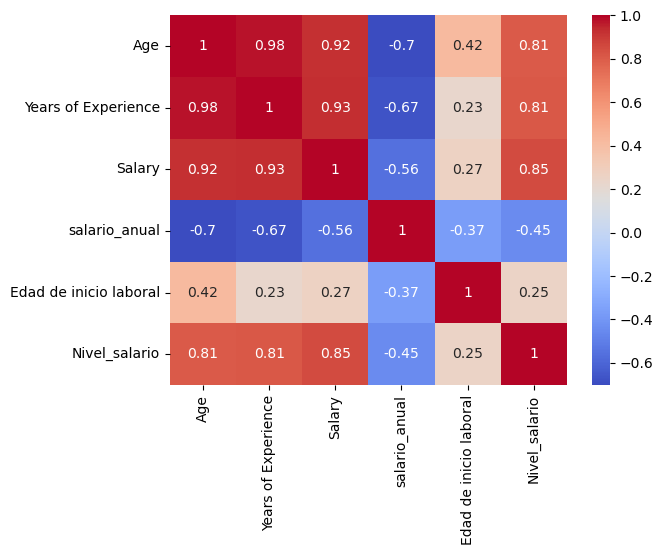

In [25]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Dejamos las variables que están aquí, pero como nota, la correlación entre Salary-Edad de Inicio laboral, la tendremos en consideración para quitarla ya que no da mucha importancia, pero al tener pocos datos, la dejaremos.

In [26]:
#Convertimos nuestras variables de categoricas a numericas para poder trabajar sobre ellas y crear nuestro modelo:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = df2.select_dtypes(include=['object']).columns

# Crear una instancia del codificador ordinal
ordinal_enc = OrdinalEncoder()

# Ajustar y transformar el DataFrame
df2[cat_cols] = ordinal_enc.fit_transform(df2[cat_cols])

# Mostrar el resultado
print(df2)   #probar one hot con las categorias

      Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0    32.0     1.0              0.0      153.0                  5.0   90000.0   
1    28.0     0.0              1.0       16.0                  3.0   65000.0   
2    45.0     1.0              2.0      125.0                 15.0  150000.0   
3    36.0     0.0              0.0       97.0                  7.0   60000.0   
4    52.0     1.0              1.0       19.0                 20.0  200000.0   
..    ...     ...              ...        ...                  ...       ...   
370  35.0     0.0              0.0      126.0                  8.0   85000.0   
371  43.0     1.0              1.0       27.0                 19.0  170000.0   
372  29.0     0.0              0.0       66.0                  2.0   40000.0   
373  34.0     1.0              0.0      132.0                  7.0   90000.0   
374  44.0     0.0              2.0      105.0                 15.0  150000.0   

     salario_anual  nivel de experienci

In [27]:
df2.head(60)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,salario_anual,nivel de experiencia,Edad de inicio laboral,Nivel_salario
0,32.0,1.0,0.0,153.0,5.0,90000.0,18000.000000,1.0,27.0,0
1,28.0,0.0,1.0,16.0,3.0,65000.0,21666.666667,1.0,25.0,0
2,45.0,1.0,2.0,125.0,15.0,150000.0,10000.000000,0.0,30.0,1
3,36.0,0.0,0.0,97.0,7.0,60000.0,8571.428571,1.0,29.0,0
4,52.0,1.0,1.0,19.0,20.0,200000.0,10000.000000,0.0,32.0,1
5,29.0,1.0,0.0,77.0,2.0,55000.0,27500.000000,2.0,27.0,0
6,42.0,0.0,1.0,89.0,12.0,120000.0,10000.000000,0.0,30.0,1
7,31.0,1.0,0.0,100.0,4.0,80000.0,20000.000000,1.0,27.0,0
8,26.0,0.0,0.0,78.0,1.0,45000.0,45000.000000,2.0,25.0,0
9,38.0,1.0,2.0,145.0,10.0,110000.0,11000.000000,1.0,28.0,1


### NOTAS EXPLORACIÓN Y LIMPIEZA DE DATOS

* Se puede crear cátegorias para bajar la cardinalidad de nuestra variable JOB TITLE
* Podemos quitar la variable creada de Edad de Inicio Laboral
* Podemos tratar un One Hot con las nuevas cáteogrias de Job Title
* Cambiar años de experiencia a un número diferente a 0

Todo esto se va a ir optimizando para el mejoramiento del modelo.

# EN PROCESO

# Regresión lineal

In [28]:
#Dividimos 'X', y 'Y'
X= df2[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience','salario_anual','nivel de experiencia','Edad de inicio laboral','Nivel_salario']]
Y= df2['Salary']

In [29]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=5) 


In [30]:
#Procedemos a escalar los datos para que no haya favoritismo por una variable mas grande
#escalamos
#from sklearn import preprocessing
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)#si quedan feos, con y_train


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [31]:
#Guardar el método de escalamiento para aplicarlo después a los datos nuevos a predecir
scaler = StandardScaler().fit(X_train)

In [32]:

#inicializar el modelo
model_lr = LinearRegression()

#entrenar el modelo
model_lr.fit(X_train,y_train)

#predecir  
salario_pred = model_lr.predict(X_test)

#caclular el MSE (error cuadratico medio)
mse= mean_squared_error(y_test, salario_pred) #datos reales vs los que predecimos

print('MSE', mse) #mienttas mas pequeño mejor 

r2 = r2_score(y_test, salario_pred)
print("R2", r2)

MSE 219795474.49291074
R2 0.9043206319791907


In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Preparamos el cross validation
cv = KFold(n_splits=10,random_state=1, shuffle=True)

# crear modelo
model_lr = model_lr
# evaluar modelo
scores = -cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
scores_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=cv)
# Performance
print('MSE: %.4f' % (np.mean(scores)))

print("R2", np.mean(scores_r2))

MSE: 207071145.0297
R2 0.9047355989583119


# Redes neuronales

In [34]:
# Diseño del modelo

#Inicializo objeto
model = Sequential()

#Agregar capas

#Agregamos la primera capa de entrada
model.add(Dense(5, activation='tanh', input_dim=9,name='input_layer')) #tanh
#Si quisiera añadir una capa oculta extra
#model.add(Dense(10, activation='tanh', name='hidden_layer'))
#Agregamos la capa de salida
model.add(Dense(1, activation='linear',name='output_layer'))

#hiperparámetros
learning_rate=0.1 #tasa de aprendizaje
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

model.compile(loss='mean_squared_error',
              optimizer=sgd, 
             metrics = ['mse'])



C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
#Ajustamos el modelo
history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
3/3 [==============================] - 1s 97ms/step - loss: 9478768640.0000 - mse: 9478768640.0000 - val_loss: 3348869888.0000 - val_mse: 3348869888.0000
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 3551165440.0000 - mse: 3551165440.0000 - val_loss: 3059067904.0000 - val_mse: 3059067904.0000
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 3298117632.0000 - mse: 3298117632.0000 - val_loss: 1688338816.0000 - val_mse: 1688338816.0000
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 1938987776.0000 - mse: 1938987776.0000 - val_loss: 1253464832.0000 - val_mse: 1253464960.0000
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 1389610112.0000 - mse: 1389610112.0000 - val_loss: 928039808.0000 - val_mse: 928039808.0000
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 927626688.0000 - mse: 927626688.0000 - val_loss: 952797376.0000 - val_mse: 952797376.0000
Epoch 7/20

3/3 [==============================] - 0s 16ms/step - loss: 795731584.0000 - mse: 795731584.0000 - val_loss: 849459008.0000 - val_mse: 849459008.0000
Epoch 52/200
3/3 [==============================] - 0s 15ms/step - loss: 769001408.0000 - mse: 769001344.0000 - val_loss: 835242752.0000 - val_mse: 835242752.0000
Epoch 53/200
3/3 [==============================] - 0s 15ms/step - loss: 766571648.0000 - mse: 766571648.0000 - val_loss: 829993280.0000 - val_mse: 829993280.0000
Epoch 54/200
3/3 [==============================] - 0s 16ms/step - loss: 763702144.0000 - mse: 763702144.0000 - val_loss: 848987200.0000 - val_mse: 848987200.0000
Epoch 55/200
3/3 [==============================] - 0s 14ms/step - loss: 768094208.0000 - mse: 768094208.0000 - val_loss: 832819264.0000 - val_mse: 832819264.0000
Epoch 56/200
3/3 [==============================] - 0s 17ms/step - loss: 805560960.0000 - mse: 805560960.0000 - val_loss: 868246848.0000 - val_mse: 868246848.0000
Epoch 57/200
3/3 [=================

3/3 [==============================] - 0s 16ms/step - loss: 783867648.0000 - mse: 783867648.0000 - val_loss: 839685056.0000 - val_mse: 839685056.0000
Epoch 102/200
3/3 [==============================] - 0s 15ms/step - loss: 781594496.0000 - mse: 781594496.0000 - val_loss: 839723584.0000 - val_mse: 839723584.0000
Epoch 103/200
3/3 [==============================] - 0s 14ms/step - loss: 777524544.0000 - mse: 777524544.0000 - val_loss: 836961152.0000 - val_mse: 836961152.0000
Epoch 104/200
3/3 [==============================] - 0s 16ms/step - loss: 761272576.0000 - mse: 761272576.0000 - val_loss: 857263744.0000 - val_mse: 857263744.0000
Epoch 105/200
3/3 [==============================] - 0s 14ms/step - loss: 777922752.0000 - mse: 777922624.0000 - val_loss: 834289792.0000 - val_mse: 834289792.0000
Epoch 106/200
3/3 [==============================] - 0s 17ms/step - loss: 764864512.0000 - mse: 764864512.0000 - val_loss: 852937024.0000 - val_mse: 852937024.0000
Epoch 107/200
3/3 [===========

3/3 [==============================] - 0s 15ms/step - loss: 782043136.0000 - mse: 782043200.0000 - val_loss: 832439680.0000 - val_mse: 832439680.0000
Epoch 152/200
3/3 [==============================] - 0s 15ms/step - loss: 798194368.0000 - mse: 798194368.0000 - val_loss: 837650240.0000 - val_mse: 837650240.0000
Epoch 153/200
3/3 [==============================] - 0s 16ms/step - loss: 794192384.0000 - mse: 794192384.0000 - val_loss: 833112640.0000 - val_mse: 833112640.0000
Epoch 154/200
3/3 [==============================] - 0s 17ms/step - loss: 782962432.0000 - mse: 782962432.0000 - val_loss: 836253952.0000 - val_mse: 836253952.0000
Epoch 155/200
3/3 [==============================] - 0s 18ms/step - loss: 776584512.0000 - mse: 776584512.0000 - val_loss: 847380992.0000 - val_mse: 847380992.0000
Epoch 156/200
3/3 [==============================] - 0s 17ms/step - loss: 772581632.0000 - mse: 772581632.0000 - val_loss: 828130624.0000 - val_mse: 828130624.0000
Epoch 157/200
3/3 [===========

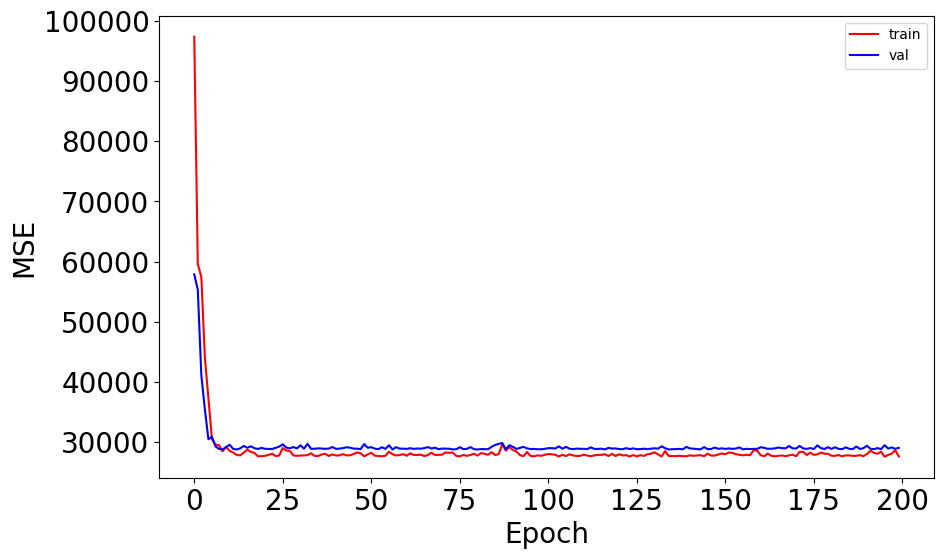

In [36]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [37]:
#Evaluación del modelo

#Evaluación del modelo en los datos de prueba
score = model.evaluate(X_test,y_test)
print('Test mse:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 843033216.0000 - mse: 843033216.0000
Test mse: 843033216.0


4/4 [==============================] - 0s 1ms/step


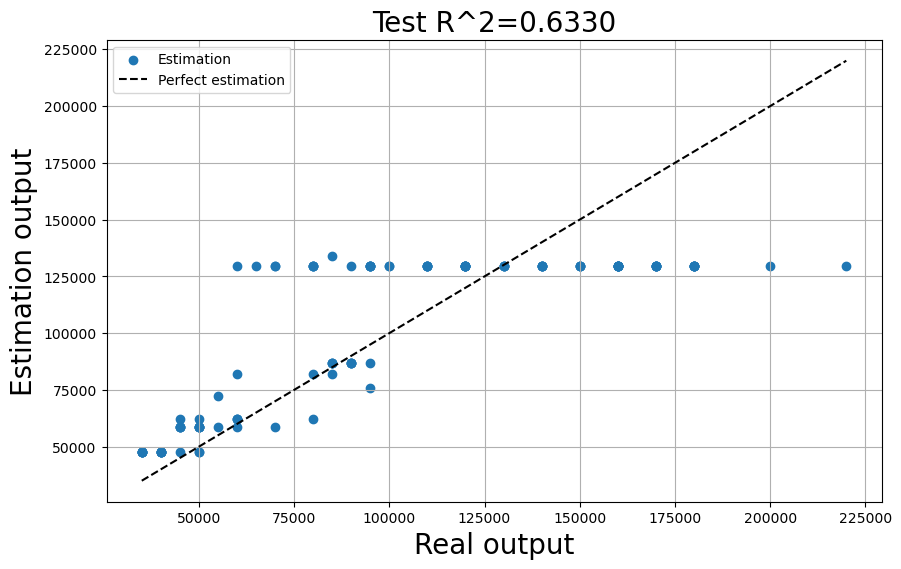

In [38]:
#Predicción  y calcular R2

#Con datos del test
yhat = model.predict(X_test)
R2_score = r2_score(y_test,yhat)
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()


In [39]:
print('R2:', R2_score)

R2: 0.6330184316899616


In [40]:
## Cross Validation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score#

### Optimización de hiperparámetros

**GridSearch**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,make_scorer

In [42]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(5,activation='tanh',input_dim=9))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100
#learning_rate = 0.1
#decay_rate = learning_rate/epochs
#momentum = 0.8

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)#malla

selection_score = make_scorer(r2_score) #r2
#selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=2,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

# Imprimir resultados
# means es de la R2 que pusimos antes
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Epoch 1/200


C:\Users\rodrigsa\AppData\Local\Temp\ipykernel_50868\4116529564.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 7914261504.0000 - mse: 7914261504.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3462439168.0000 - mse: 3462439168.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 2363002624.0000 - mse: 2363002624.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1767625984.0000 - mse: 1767625984.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1725068800.0000 - mse: 1725068800.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1769447296.0000 - mse: 1769447296.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1416979712.0000 - mse: 1416979712.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1482868864.0000 - mse: 1482868864.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1727032064.0000 - mse: 1727032064.0000
Epoch 10/200
4/4 [====

Epoch 75/200
4/4 [==============================] - 0s 2ms/step - loss: 1331304704.0000 - mse: 1331304704.0000
Epoch 76/200
4/4 [==============================] - 0s 2ms/step - loss: 1566123904.0000 - mse: 1566123904.0000
Epoch 77/200
4/4 [==============================] - 0s 1ms/step - loss: 1717746816.0000 - mse: 1717746816.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 1515400960.0000 - mse: 1515400960.0000
Epoch 79/200
4/4 [==============================] - 0s 1ms/step - loss: 1612188544.0000 - mse: 1612188544.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 1516315776.0000 - mse: 1516315776.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 1500944128.0000 - mse: 1500944128.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 1503245440.0000 - mse: 1503245440.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 1349452800.0000 - mse: 1349452800.0000
E

4/4 [==============================] - 0s 2ms/step - loss: 1551671936.0000 - mse: 1551671936.0000
Epoch 149/200
4/4 [==============================] - 0s 2ms/step - loss: 1471053312.0000 - mse: 1471053312.0000
Epoch 150/200
4/4 [==============================] - 0s 1ms/step - loss: 1331217024.0000 - mse: 1331217024.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 1520018688.0000 - mse: 1520018688.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 1598364416.0000 - mse: 1598364416.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 1672764160.0000 - mse: 1672764160.0000
Epoch 154/200
4/4 [==============================] - 0s 1ms/step - loss: 1311580544.0000 - mse: 1311580544.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 1295224448.0000 - mse: 1295224448.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 1337488640.0000 - mse: 1337488640.0000
Epoch 

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 1ms/step - loss: 8384235520.0000 - mse: 8384235520.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 4173423616.0000 - mse: 4173423616.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 2285552128.0000 - mse: 2285552128.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1433115520.0000 - mse: 1433115520.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1027938176.0000 - mse: 1027938176.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 973604288.0000 - mse: 973604288.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1036344128.0000 - mse: 1036344128.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 891510976.0000 - mse: 891510976.0000
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 786538304.0000 - mse: 786538304.0000
Epoch 10/200
4/4 [==========

4/4 [==============================] - 0s 1ms/step - loss: 790551616.0000 - mse: 790551616.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 835065984.0000 - mse: 835065984.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 898008960.0000 - mse: 898008960.0000
Epoch 79/200
4/4 [==============================] - 0s 1ms/step - loss: 1054498944.0000 - mse: 1054498944.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 745999232.0000 - mse: 745999232.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 808813568.0000 - mse: 808813568.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 782480768.0000 - mse: 782480768.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 785344896.0000 - mse: 785344896.0000
Epoch 84/200
4/4 [==============================] - 0s 1ms/step - loss: 778224064.0000 - mse: 778224064.0000
Epoch 85/200
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 789580416.0000 - mse: 789580416.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 751457152.0000 - mse: 751457152.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 765161152.0000 - mse: 765161152.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 770983808.0000 - mse: 770983808.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 750173248.0000 - mse: 750173248.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 789886848.0000 - mse: 789886848.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 749857344.0000 - mse: 749857344.0000
Epoch 157/200
4/4 [==============================] - 0s 1ms/step - loss: 768017600.0000 - mse: 768017600.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 777037696.0000 - mse: 777037696.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 6014764032.0000 - mse: 6014764032.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1334410880.0000 - mse: 1334410880.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 570520192.0000 - mse: 570520192.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 505961472.0000 - mse: 505961472.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 571916800.0000 - mse: 571916800.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 517978880.0000 - mse: 517978880.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 497302560.0000 - mse: 497302560.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 508491104.0000 - mse: 508491104.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 500102048.0000 - mse: 500102048.0000
Epoch 10/200
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 497755200.0000 - mse: 497755200.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 542268992.0000 - mse: 542268992.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 491383264.0000 - mse: 491383264.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 513414304.0000 - mse: 513414304.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 501986080.0000 - mse: 501986080.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 501476320.0000 - mse: 501476320.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 538755520.0000 - mse: 538755520.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 527078656.0000 - mse: 527078656.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 495876288.0000 - mse: 495876288.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 538863296.0000 - mse: 538863296.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 521368064.0000 - mse: 521368064.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 494064704.0000 - mse: 494064704.0000
Epoch 153/200
4/4 [==============================] - 0s 1ms/step - loss: 494028576.0000 - mse: 494028576.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 488303264.0000 - mse: 488303264.0000
Epoch 155/200
4/4 [==============================] - 0s 1ms/step - loss: 515546176.0000 - mse: 515546176.0000
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 506326336.0000 - mse: 506326336.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 495166976.0000 - mse: 495166976.0000
Epoch 158/200
4/4 [==============================] - 0s 1ms/step - loss: 552980544.0000 - mse: 552980544.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 8400743424.0000 - mse: 8400743424.0000
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 2671829504.0000 - mse: 2671829504.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1310199168.0000 - mse: 1310199168.0000
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1013186368.0000 - mse: 1013186368.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1106316800.0000 - mse: 1106316800.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1008145408.0000 - mse: 1008145408.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1025039872.0000 - mse: 1025039872.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1076429056.0000 - mse: 1076429056.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 942744960.0000 - mse: 942744960.0000
Epoch 10/200
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 950821056.0000 - mse: 950821056.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 905242496.0000 - mse: 905242496.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 848882688.0000 - mse: 848882688.0000
Epoch 79/200
4/4 [==============================] - 0s 1ms/step - loss: 988701760.0000 - mse: 988701760.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 879574784.0000 - mse: 879574784.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 864433536.0000 - mse: 864433536.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 978454720.0000 - mse: 978454720.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 995208128.0000 - mse: 995208128.0000
Epoch 84/200
4/4 [==============================] - 0s 1ms/step - loss: 966072000.0000 - mse: 966072000.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 889649280.0000 - mse: 889649280.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 932265792.0000 - mse: 932265792.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 850045952.0000 - mse: 850045952.0000
Epoch 153/200
4/4 [==============================] - 0s 1ms/step - loss: 885126528.0000 - mse: 885126528.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 911855808.0000 - mse: 911855808.0000
Epoch 155/200
4/4 [==============================] - 0s 1ms/step - loss: 899624256.0000 - mse: 899624256.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 907166144.0000 - mse: 907166144.0000
Epoch 157/200
4/4 [==============================] - 0s 1ms/step - loss: 856936512.0000 - mse: 856936512.0000
Epoch 158/200
4/4 [==============================] - 0s 1ms/step - loss: 877163712.0000 - mse: 877163712.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 6064223744.0000 - mse: 6064223744.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 921105664.0000 - mse: 921105664.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 694079872.0000 - mse: 694079872.0000
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 686872000.0000 - mse: 686872000.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 680486592.0000 - mse: 680486592.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 663774528.0000 - mse: 663774528.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 658076864.0000 - mse: 658076864.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 732479360.0000 - mse: 732479360.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 677413760.0000 - mse: 677413760.0000
Epoch 10/200
4/4 [====================

4/4 [==============================] - 0s 2ms/step - loss: 664421120.0000 - mse: 664421120.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 682951936.0000 - mse: 682951936.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 642305408.0000 - mse: 642305408.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 631139072.0000 - mse: 631139072.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 649102144.0000 - mse: 649102144.0000
Epoch 81/200
4/4 [==============================] - 0s 1ms/step - loss: 628985792.0000 - mse: 628985792.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 687479872.0000 - mse: 687479872.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 743557760.0000 - mse: 743557760.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 641563520.0000 - mse: 641563520.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 1ms/step - loss: 651133504.0000 - mse: 651133504.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 655489216.0000 - mse: 655489216.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 641980992.0000 - mse: 641980992.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 690281344.0000 - mse: 690281344.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 685651200.0000 - mse: 685651200.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 656001408.0000 - mse: 656001408.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 660414592.0000 - mse: 660414592.0000
Epoch 157/200
4/4 [==============================] - 0s 1ms/step - loss: 643246912.0000 - mse: 643246912.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 650010048.0000 - mse: 650010048.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 7200361472.0000 - mse: 7200361472.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1242804480.0000 - mse: 1242804480.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1030551936.0000 - mse: 1030551936.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 905410496.0000 - mse: 905410496.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 863759488.0000 - mse: 863759488.0000
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 839124608.0000 - mse: 839124608.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 818732800.0000 - mse: 818732800.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 852612480.0000 - mse: 852612480.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 851438080.0000 - mse: 851438080.0000
Epoch 10/200
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 819953856.0000 - mse: 819953856.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 828479872.0000 - mse: 828479872.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 841239872.0000 - mse: 841239872.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 812241664.0000 - mse: 812241664.0000
Epoch 80/200
4/4 [==============================] - 0s 1ms/step - loss: 875156224.0000 - mse: 875156224.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 906336000.0000 - mse: 906336000.0000
Epoch 82/200
4/4 [==============================] - 0s 1ms/step - loss: 847659200.0000 - mse: 847659200.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 862103808.0000 - mse: 862103808.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 844219968.0000 - mse: 844219968.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 856655296.0000 - mse: 856655296.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 801481344.0000 - mse: 801481344.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 848763968.0000 - mse: 848763968.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 811028608.0000 - mse: 811028608.0000
Epoch 154/200
4/4 [==============================] - 0s 1ms/step - loss: 848470016.0000 - mse: 848470016.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 845199872.0000 - mse: 845199872.0000
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 819509888.0000 - mse: 819509888.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 838914560.0000 - mse: 838914560.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 822114368.0000 - mse: 822114368.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 7264908800.0000 - mse: 7264908800.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2565067008.0000 - mse: 2565067008.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1288084608.0000 - mse: 1288084608.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 651961792.0000 - mse: 651961792.0000
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 714321280.0000 - mse: 714321216.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 551928000.0000 - mse: 551928000.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 533644544.0000 - mse: 533644544.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 527592000.0000 - mse: 527592000.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 541525888.0000 - mse: 541525888.0000
Epoch 10/200
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 531668480.0000 - mse: 531668480.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 525699520.0000 - mse: 525699520.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 544960768.0000 - mse: 544960768.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 535287584.0000 - mse: 535287584.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 523611712.0000 - mse: 523611712.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 532061760.0000 - mse: 532061760.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 512606304.0000 - mse: 512606304.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 528621568.0000 - mse: 528621568.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 545036672.0000 - mse: 545036672.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 536338560.0000 - mse: 536338560.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 531067968.0000 - mse: 531067968.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 517858368.0000 - mse: 517858368.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 547273536.0000 - mse: 547273536.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 522883744.0000 - mse: 522883744.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 539299328.0000 - mse: 539299328.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 525637376.0000 - mse: 525637376.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 520244640.0000 - mse: 520244640.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 515084416.0000 - mse: 515084416.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 8770377728.0000 - mse: 8770377728.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2228411648.0000 - mse: 2228411648.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 2037728000.0000 - mse: 2037728000.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1057389056.0000 - mse: 1057389056.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 993817024.0000 - mse: 993817024.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 809295872.0000 - mse: 809295872.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 838741952.0000 - mse: 838741952.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 784309184.0000 - mse: 784309184.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 767795904.0000 - mse: 767795904.0000
Epoch 10/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 778136320.0000 - mse: 778136320.0000
Epoch 77/200
4/4 [==============================] - 0s 1ms/step - loss: 767210816.0000 - mse: 767210816.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 771216128.0000 - mse: 771216128.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 800051904.0000 - mse: 800051904.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 785226880.0000 - mse: 785226880.0000
Epoch 81/200
4/4 [==============================] - 0s 1ms/step - loss: 772938496.0000 - mse: 772938496.0000
Epoch 82/200
4/4 [==============================] - 0s 1ms/step - loss: 763366208.0000 - mse: 763366208.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 779122048.0000 - mse: 779122048.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 774206336.0000 - mse: 774206336.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 800690880.0000 - mse: 800690880.0000
Epoch 151/200
4/4 [==============================] - 0s 1ms/step - loss: 785100928.0000 - mse: 785100928.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 801635264.0000 - mse: 801635264.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 781829824.0000 - mse: 781829824.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 774159616.0000 - mse: 774159616.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 800681024.0000 - mse: 800681024.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 791906944.0000 - mse: 791906944.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 805737664.0000 - mse: 805737664.0000
Epoch 158/200
4/4 [==============================] - 0s 1ms/step - loss: 773955072.0000 - mse: 773955072.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 7770932736.0000 - mse: 7770932736.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1482310656.0000 - mse: 1482310656.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 901118400.0000 - mse: 901118400.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 793178688.0000 - mse: 793178688.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 763345664.0000 - mse: 763345664.0000
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 742934912.0000 - mse: 742934912.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 732995840.0000 - mse: 732995840.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 740104576.0000 - mse: 740104576.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 725032320.0000 - mse: 725032320.0000
Epoch 10/200
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 721332608.0000 - mse: 721332608.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 743032704.0000 - mse: 743032704.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 729153216.0000 - mse: 729153216.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 724184512.0000 - mse: 724184512.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 726475712.0000 - mse: 726475712.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 725590656.0000 - mse: 725590656.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 719026432.0000 - mse: 719026432.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 723261312.0000 - mse: 723261312.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 717423296.0000 - mse: 717423296.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 731966336.0000 - mse: 731966336.0000
Epoch 151/200
4/4 [==============================] - 0s 1ms/step - loss: 716189824.0000 - mse: 716189824.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 730424576.0000 - mse: 730424576.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 718056960.0000 - mse: 718056960.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 716946368.0000 - mse: 716946368.0000
Epoch 155/200
4/4 [==============================] - 0s 1ms/step - loss: 738170432.0000 - mse: 738170432.0000
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 736207168.0000 - mse: 736207168.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 724101952.0000 - mse: 724101952.0000
Epoch 158/200
4/4 [==============================] - 0s 1ms/step - loss: 724205312.0000 - mse: 724205312.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 9874122752.0000 - mse: 9874122752.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1530626048.0000 - mse: 1530626048.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1118488960.0000 - mse: 1118488960.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 989983680.0000 - mse: 989983680.0000
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 946609152.0000 - mse: 946609152.0000
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 923856320.0000 - mse: 923856320.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 902746496.0000 - mse: 902746496.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 910216320.0000 - mse: 910216320.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 906219008.0000 - mse: 906219008.0000
Epoch 10/200
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 932712960.0000 - mse: 932712960.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 923193152.0000 - mse: 923193152.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 885206272.0000 - mse: 885206272.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 912969152.0000 - mse: 912969152.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 893531136.0000 - mse: 893531136.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 889554240.0000 - mse: 889554240.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 881968896.0000 - mse: 881968896.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 906710080.0000 - mse: 906710080.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 896187456.0000 - mse: 896187456.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 882745728.0000 - mse: 882745728.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 892483904.0000 - mse: 892483904.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 886737792.0000 - mse: 886737792.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 881220800.0000 - mse: 881220800.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 884828992.0000 - mse: 884828992.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 885161472.0000 - mse: 885161472.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 940727936.0000 - mse: 940727936.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 886431616.0000 - mse: 886431616.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 883412352.0000 - mse: 883412352.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 7287608832.0000 - mse: 7287608832.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1758987136.0000 - mse: 1758987136.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1291339008.0000 - mse: 1291339008.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1112290560.0000 - mse: 1112290560.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1019958720.0000 - mse: 1019958720.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 955886912.0000 - mse: 955886912.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 903425920.0000 - mse: 903425920.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 864784512.0000 - mse: 864784512.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 841320640.0000 - mse: 841320640.0000
Epoch 10/200
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 779572288.0000 - mse: 779572288.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 783047680.0000 - mse: 783047680.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 776464448.0000 - mse: 776464448.0000
Epoch 79/200
4/4 [==============================] - 0s 1ms/step - loss: 797527040.0000 - mse: 797527040.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 799060224.0000 - mse: 799060224.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 782192256.0000 - mse: 782192256.0000
Epoch 82/200
4/4 [==============================] - 0s 1ms/step - loss: 776710592.0000 - mse: 776710592.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 798378240.0000 - mse: 798378240.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 781202496.0000 - mse: 781202496.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 776990528.0000 - mse: 776990528.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 797113984.0000 - mse: 797113984.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 826017280.0000 - mse: 826017280.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 792613952.0000 - mse: 792613952.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 787944128.0000 - mse: 787944128.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 773688640.0000 - mse: 773688640.0000
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 801644608.0000 - mse: 801644608.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 783720512.0000 - mse: 783720512.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 777350464.0000 - mse: 777350464.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 1ms/step - loss: 7312524288.0000 - mse: 7312524288.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1448519040.0000 - mse: 1448519040.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1216272000.0000 - mse: 1216272000.0000
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1168837376.0000 - mse: 1168837376.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1147735040.0000 - mse: 1147735040.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1154333952.0000 - mse: 1154333952.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1141175168.0000 - mse: 1141175168.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1111891200.0000 - mse: 1111891200.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1123859072.0000 - mse: 1123859072.0000
Epoch 10/200
4/4 [====

Epoch 75/200
4/4 [==============================] - 0s 1ms/step - loss: 1094208000.0000 - mse: 1094208000.0000
Epoch 76/200
4/4 [==============================] - 0s 2ms/step - loss: 1088360320.0000 - mse: 1088360320.0000
Epoch 77/200
4/4 [==============================] - 0s 1ms/step - loss: 1084486784.0000 - mse: 1084486784.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 1074439680.0000 - mse: 1074439680.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 1084067328.0000 - mse: 1084067328.0000
Epoch 80/200
4/4 [==============================] - 0s 1ms/step - loss: 1084008704.0000 - mse: 1084008704.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 1097042944.0000 - mse: 1097042944.0000
Epoch 82/200
4/4 [==============================] - 0s 1ms/step - loss: 1088862208.0000 - mse: 1088862208.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 1095971584.0000 - mse: 1095971584.0000
E

4/4 [==============================] - 0s 1ms/step - loss: 1081011968.0000 - mse: 1081011968.0000
Epoch 149/200
4/4 [==============================] - 0s 2ms/step - loss: 1092959872.0000 - mse: 1092959872.0000
Epoch 150/200
4/4 [==============================] - 0s 2ms/step - loss: 1081340928.0000 - mse: 1081340928.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 1093398784.0000 - mse: 1093398784.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 1086796160.0000 - mse: 1086796160.0000
Epoch 153/200
4/4 [==============================] - 0s 1ms/step - loss: 1082852608.0000 - mse: 1082852608.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 1087538432.0000 - mse: 1087538432.0000
Epoch 155/200
4/4 [==============================] - 0s 1ms/step - loss: 1097156096.0000 - mse: 1097156096.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 1107014784.0000 - mse: 1107014784.0000
Epoch 

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 10661551104.0000 - mse: 10661551104.0000
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 4388739072.0000 - mse: 4388739072.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 2017131776.0000 - mse: 2017131776.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1662740992.0000 - mse: 1662740992.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1021991616.0000 - mse: 1021991616.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 875013696.0000 - mse: 875013696.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 735995968.0000 - mse: 735995968.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 636287552.0000 - mse: 636287552.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 570869952.0000 - mse: 570869952.0000
Epoch 10/200
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 456277184.0000 - mse: 456277184.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 453888160.0000 - mse: 453888160.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 455545056.0000 - mse: 455545056.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 456004256.0000 - mse: 456004256.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 458267072.0000 - mse: 458267072.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 458288288.0000 - mse: 458288288.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 455623776.0000 - mse: 455623776.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 454539328.0000 - mse: 454539328.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 456361792.0000 - mse: 456361792.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 454198688.0000 - mse: 454198688.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 454352544.0000 - mse: 454352544.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 455428608.0000 - mse: 455428608.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 455305376.0000 - mse: 455305376.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 457868416.0000 - mse: 457868416.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 455636480.0000 - mse: 455636480.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 456999296.0000 - mse: 456999296.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 455602336.0000 - mse: 455602336.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 455243008.0000 - mse: 455243008.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 11472600064.0000 - mse: 11472600064.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3904695040.0000 - mse: 3904695040.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1685942912.0000 - mse: 1685942912.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1783701248.0000 - mse: 1783701248.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1981003136.0000 - mse: 1981003136.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1385838592.0000 - mse: 1385838592.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1165091200.0000 - mse: 1165091200.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1174601472.0000 - mse: 1174601472.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1135467520.0000 - mse: 1135467520.0000
Epoch 10/200
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 687924864.0000 - mse: 687924864.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 684941952.0000 - mse: 684941952.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 690720768.0000 - mse: 690720768.0000
Epoch 79/200
4/4 [==============================] - 0s 1ms/step - loss: 684225344.0000 - mse: 684225344.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 683166336.0000 - mse: 683166336.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 683206144.0000 - mse: 683206144.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 682298880.0000 - mse: 682298880.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 682839808.0000 - mse: 682839808.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 686016512.0000 - mse: 686016512.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 680608384.0000 - mse: 680608384.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 669867392.0000 - mse: 669867392.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 670601600.0000 - mse: 670601600.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 670932736.0000 - mse: 670932736.0000
Epoch 154/200
4/4 [==============================] - 0s 1ms/step - loss: 671604288.0000 - mse: 671604288.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 670253504.0000 - mse: 670253504.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 668954560.0000 - mse: 668954560.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 669476224.0000 - mse: 669476224.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 672145024.0000 - mse: 672145024.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 10053067776.0000 - mse: 10053067776.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2624530432.0000 - mse: 2624530432.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1347130624.0000 - mse: 1347130624.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 947581184.0000 - mse: 947581184.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 817894720.0000 - mse: 817894720.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 781803648.0000 - mse: 781803648.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 760307200.0000 - mse: 760307200.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 740894464.0000 - mse: 740894464.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 724912832.0000 - mse: 724912832.0000
Epoch 10/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 631571072.0000 - mse: 631571072.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 632269248.0000 - mse: 632269248.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 631384960.0000 - mse: 631384960.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 632774272.0000 - mse: 632774272.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 634256768.0000 - mse: 634256768.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 632485056.0000 - mse: 632485056.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 631478656.0000 - mse: 631478656.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 635680000.0000 - mse: 635680000.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 631123520.0000 - mse: 631123520.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 631826816.0000 - mse: 631826816.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 631251392.0000 - mse: 631251392.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 634557952.0000 - mse: 634557952.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 631350720.0000 - mse: 631350720.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 634595264.0000 - mse: 634595264.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 632570240.0000 - mse: 632570240.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 630533440.0000 - mse: 630533440.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 631438400.0000 - mse: 631438400.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 630749120.0000 - mse: 630749120.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 11697203200.0000 - mse: 11697203200.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 5914078208.0000 - mse: 5914078208.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 2907407616.0000 - mse: 2907407616.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 2055591424.0000 - mse: 2055591424.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1875175168.0000 - mse: 1875175168.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1784653056.0000 - mse: 1784653056.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1692566016.0000 - mse: 1692566016.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1612362240.0000 - mse: 1612362240.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1552377344.0000 - mse: 1552377344.0000
Epoch 10/200
4/4 [==

Epoch 75/200
4/4 [==============================] - 0s 2ms/step - loss: 1016376064.0000 - mse: 1016376064.0000
Epoch 76/200
4/4 [==============================] - 0s 2ms/step - loss: 1014939008.0000 - mse: 1014939008.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 1010835200.0000 - mse: 1010835200.0000
Epoch 78/200
4/4 [==============================] - 0s 1ms/step - loss: 1013344064.0000 - mse: 1013344064.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 1009547520.0000 - mse: 1009547520.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 1016978432.0000 - mse: 1016978432.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 1007288832.0000 - mse: 1007288832.0000
Epoch 82/200
4/4 [==============================] - 0s 1ms/step - loss: 1006455936.0000 - mse: 1006455936.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 1006728704.0000 - mse: 1006728704.0000
E

4/4 [==============================] - 0s 2ms/step - loss: 1004700160.0000 - mse: 1004700160.0000
Epoch 149/200
4/4 [==============================] - 0s 2ms/step - loss: 1000462208.0000 - mse: 1000462208.0000
Epoch 150/200
4/4 [==============================] - 0s 2ms/step - loss: 998661824.0000 - mse: 998661824.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 998072704.0000 - mse: 998072704.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 997112192.0000 - mse: 997112192.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 998509760.0000 - mse: 998509760.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 998087616.0000 - mse: 998087616.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 999605376.0000 - mse: 999605376.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 997832768.0000 - mse: 997832768.0000
Epoch 157/200
4/4 [=

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 11058140160.0000 - mse: 11058140160.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 7304013824.0000 - mse: 7304013824.0000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 4863296000.0000 - mse: 4863296000.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 3475377152.0000 - mse: 3475377152.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2651749376.0000 - mse: 2651749376.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 2114612608.0000 - mse: 2114612608.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1757705984.0000 - mse: 1757705984.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1480687232.0000 - mse: 1480687232.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1288384384.0000 - mse: 1288384384.0000
Epoch 10/200
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 424784096.0000 - mse: 424784096.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 425922784.0000 - mse: 425922784.0000
Epoch 78/200
4/4 [==============================] - 0s 3ms/step - loss: 426030944.0000 - mse: 426030944.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 426733184.0000 - mse: 426733184.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 428490112.0000 - mse: 428490112.0000
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 426626272.0000 - mse: 426626272.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 426829376.0000 - mse: 426829376.0000
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 424735008.0000 - mse: 424735008.0000
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 424741152.0000 - mse: 424741152.0000
Epoch 85/200
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 428745856.0000 - mse: 428745856.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 424817312.0000 - mse: 424817312.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 423904288.0000 - mse: 423904288.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 424265536.0000 - mse: 424265536.0000
Epoch 154/200
4/4 [==============================] - 0s 2ms/step - loss: 423741920.0000 - mse: 423741920.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 424547328.0000 - mse: 424547328.0000
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 424339808.0000 - mse: 424339808.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 424337280.0000 - mse: 424337280.0000
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 423456320.0000 - mse: 423456320.0000
Epoch 159/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 2ms/step - loss: 11602934784.0000 - mse: 11602934784.0000
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 6221917696.0000 - mse: 6221917696.0000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 3471894016.0000 - mse: 3471894016.0000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 2450267136.0000 - mse: 2450267136.0000
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2066033152.0000 - mse: 2066033152.0000
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1914745472.0000 - mse: 1914745472.0000
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1836361600.0000 - mse: 1836361600.0000
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1797590272.0000 - mse: 1797590272.0000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1762976640.0000 - mse: 1762976640.0000
Epoch 10/200
4/4 [==

Epoch 75/200
4/4 [==============================] - 0s 2ms/step - loss: 1054472512.0000 - mse: 1054472512.0000
Epoch 76/200
4/4 [==============================] - 0s 2ms/step - loss: 1051806272.0000 - mse: 1051806272.0000
Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 1054757760.0000 - mse: 1054757760.0000
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 1045925184.0000 - mse: 1045925184.0000
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 1042494720.0000 - mse: 1042494720.0000
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 1040287360.0000 - mse: 1040287360.0000
Epoch 81/200
4/4 [==============================] - 0s 1ms/step - loss: 1035128064.0000 - mse: 1035128064.0000
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 1033282688.0000 - mse: 1033282688.0000
Epoch 83/200
4/4 [==============================] - 0s 1ms/step - loss: 1029412480.0000 - mse: 1029412480.0000
E

4/4 [==============================] - 0s 2ms/step - loss: 926195712.0000 - mse: 926195712.0000
Epoch 150/200
4/4 [==============================] - 0s 2ms/step - loss: 925974144.0000 - mse: 925974144.0000
Epoch 151/200
4/4 [==============================] - 0s 2ms/step - loss: 921925376.0000 - mse: 921925376.0000
Epoch 152/200
4/4 [==============================] - 0s 2ms/step - loss: 922378816.0000 - mse: 922378816.0000
Epoch 153/200
4/4 [==============================] - 0s 2ms/step - loss: 920470272.0000 - mse: 920470272.0000
Epoch 154/200
4/4 [==============================] - 0s 1ms/step - loss: 932850304.0000 - mse: 932850304.0000
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 918799232.0000 - mse: 918799232.0000
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 919586880.0000 - mse: 919586880.0000
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 921594240.0000 - mse: 921594240.0000
Epoch 158/200
4/4 [=====

C:\Users\rodrigsa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 1ms/step - loss: 8445842944.0000 - mse: 8445842944.0000
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 3455749632.0000 - mse: 3455749632.0000
Epoch 3/200
8/8 [==============================] - 0s 1ms/step - loss: 1951776256.0000 - mse: 1951776256.0000
Epoch 4/200
8/8 [==============================] - 0s 1ms/step - loss: 1515170688.0000 - mse: 1515170688.0000
Epoch 5/200
8/8 [==============================] - 0s 1ms/step - loss: 1339740416.0000 - mse: 1339740416.0000
Epoch 6/200
8/8 [==============================] - 0s 1ms/step - loss: 1240008704.0000 - mse: 1240008704.0000
Epoch 7/200
8/8 [==============================] - 0s 1ms/step - loss: 1168302848.0000 - mse: 1168302848.0000
Epoch 8/200
8/8 [==============================] - 0s 1ms/step - loss: 1112083328.0000 - mse: 1112083328.0000
Epoch 9/200
8/8 [==============================] - 0s 1ms/step - loss: 1062345088.0000 - mse: 1062345088.0000
Epoch 10/200
8/8 [====

8/8 [==============================] - 0s 1ms/step - loss: 465654592.0000 - mse: 465654592.0000
Epoch 77/200
8/8 [==============================] - 0s 1ms/step - loss: 465567616.0000 - mse: 465567616.0000
Epoch 78/200
8/8 [==============================] - 0s 1ms/step - loss: 464458720.0000 - mse: 464458720.0000
Epoch 79/200
8/8 [==============================] - 0s 1ms/step - loss: 463111712.0000 - mse: 463111712.0000
Epoch 80/200
8/8 [==============================] - 0s 1ms/step - loss: 462290048.0000 - mse: 462290048.0000
Epoch 81/200
8/8 [==============================] - 0s 1ms/step - loss: 462968128.0000 - mse: 462968128.0000
Epoch 82/200
8/8 [==============================] - 0s 1ms/step - loss: 461772576.0000 - mse: 461772576.0000
Epoch 83/200
8/8 [==============================] - 0s 1ms/step - loss: 461376704.0000 - mse: 461376704.0000
Epoch 84/200
8/8 [==============================] - 0s 1ms/step - loss: 460179520.0000 - mse: 460179520.0000
Epoch 85/200
8/8 [==============

8/8 [==============================] - 0s 1ms/step - loss: 452977376.0000 - mse: 452977376.0000
Epoch 151/200
8/8 [==============================] - 0s 1ms/step - loss: 453569184.0000 - mse: 453569184.0000
Epoch 152/200
8/8 [==============================] - 0s 1ms/step - loss: 453211232.0000 - mse: 453211232.0000
Epoch 153/200
8/8 [==============================] - 0s 1ms/step - loss: 452436320.0000 - mse: 452436320.0000
Epoch 154/200
8/8 [==============================] - 0s 1ms/step - loss: 452730048.0000 - mse: 452730048.0000
Epoch 155/200
8/8 [==============================] - 0s 1ms/step - loss: 453581792.0000 - mse: 453581792.0000
Epoch 156/200
8/8 [==============================] - 0s 1ms/step - loss: 452407936.0000 - mse: 452407936.0000
Epoch 157/200
8/8 [==============================] - 0s 1ms/step - loss: 452484096.0000 - mse: 452484096.0000
Epoch 158/200
8/8 [==============================] - 0s 1ms/step - loss: 452698592.0000 - mse: 452698592.0000
Epoch 159/200
8/8 [=====

In [43]:
print('Mejores parámetros:')
print(grid_result.best_params_)
print('Mejores score:')
print(grid_result.best_score_)
my_model= grid_result.best_estimator_
#my_model.model.summary()
weights = my_model.model.get_weights() #pesos

Mejores parámetros:
{'lr': 0.01, 'momentum': 0.4}
Mejores score:
0.7380828802915441


In [44]:
#Diseñar modelo con métricas optimizadas
epochs = 200
learning_rate = 0.01
decay_rate = learning_rate/epochs
momentum = 0.4

# Red neuronal
model = Sequential()
model.add(Dense(5,activation='tanh',input_dim=9))
model.add(Dense(1,activation='linear'))

# Optimizer configuration
#gradiente descendente
opt = keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mse'])

#Ajustar modelo
model_history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

#performance
score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test mse:', score[1])

Epoch 1/200
2/2 [==============================] - 0s 128ms/step - loss: 12601624576.0000 - mse: 12601624576.0000 - val_loss: 10187318272.0000 - val_mse: 10187318272.0000
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 10282745856.0000 - mse: 10282745856.0000 - val_loss: 8085287936.0000 - val_mse: 8085287936.0000
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 8270422016.0000 - mse: 8270422016.0000 - val_loss: 6100739584.0000 - val_mse: 6100739584.0000
Epoch 4/200
2/2 [==============================] - 0s 29ms/step - loss: 6319876096.0000 - mse: 6319876096.0000 - val_loss: 4641471488.0000 - val_mse: 4641471488.0000
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 5044577280.0000 - mse: 5044577792.0000 - val_loss: 3761070336.0000 - val_mse: 3761070336.0000
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 4151372032.0000 - mse: 4151372032.0000 - val_loss: 3128053760.0000 - val_mse: 3128053760.00

2/2 [==============================] - 0s 27ms/step - loss: 819110464.0000 - mse: 819110464.0000 - val_loss: 819825280.0000 - val_mse: 819825280.0000
Epoch 51/200
2/2 [==============================] - 0s 24ms/step - loss: 811841280.0000 - mse: 811841280.0000 - val_loss: 814049920.0000 - val_mse: 814049920.0000
Epoch 52/200
2/2 [==============================] - 0s 29ms/step - loss: 804787968.0000 - mse: 804787968.0000 - val_loss: 806258752.0000 - val_mse: 806258752.0000
Epoch 53/200
2/2 [==============================] - 0s 25ms/step - loss: 797296384.0000 - mse: 797296384.0000 - val_loss: 800505856.0000 - val_mse: 800505856.0000
Epoch 54/200
2/2 [==============================] - 0s 27ms/step - loss: 790556992.0000 - mse: 790556992.0000 - val_loss: 794644864.0000 - val_mse: 794644864.0000
Epoch 55/200
2/2 [==============================] - 0s 28ms/step - loss: 784551104.0000 - mse: 784551104.0000 - val_loss: 789602240.0000 - val_mse: 789602240.0000
Epoch 56/200
2/2 [=================

2/2 [==============================] - 0s 27ms/step - loss: 670917056.0000 - mse: 670917056.0000 - val_loss: 706065856.0000 - val_mse: 706065856.0000
Epoch 101/200
2/2 [==============================] - 0s 25ms/step - loss: 670199360.0000 - mse: 670199360.0000 - val_loss: 703181184.0000 - val_mse: 703181184.0000
Epoch 102/200
2/2 [==============================] - 0s 29ms/step - loss: 669250816.0000 - mse: 669250816.0000 - val_loss: 701956736.0000 - val_mse: 701956736.0000
Epoch 103/200
2/2 [==============================] - 0s 27ms/step - loss: 668586176.0000 - mse: 668586176.0000 - val_loss: 701569536.0000 - val_mse: 701569536.0000
Epoch 104/200
2/2 [==============================] - 0s 32ms/step - loss: 667749568.0000 - mse: 667749568.0000 - val_loss: 701186240.0000 - val_mse: 701186240.0000
Epoch 105/200
2/2 [==============================] - 0s 27ms/step - loss: 668320320.0000 - mse: 668320320.0000 - val_loss: 706212736.0000 - val_mse: 706212736.0000
Epoch 106/200
2/2 [===========

2/2 [==============================] - 0s 30ms/step - loss: 652364672.0000 - mse: 652364672.0000 - val_loss: 689526080.0000 - val_mse: 689526080.0000
Epoch 151/200
2/2 [==============================] - 0s 25ms/step - loss: 652305792.0000 - mse: 652305792.0000 - val_loss: 691011776.0000 - val_mse: 691011776.0000
Epoch 152/200
2/2 [==============================] - 0s 31ms/step - loss: 652204416.0000 - mse: 652204416.0000 - val_loss: 694123264.0000 - val_mse: 694123264.0000
Epoch 153/200
2/2 [==============================] - 0s 31ms/step - loss: 652089856.0000 - mse: 652089856.0000 - val_loss: 695266944.0000 - val_mse: 695266944.0000
Epoch 154/200
2/2 [==============================] - 0s 28ms/step - loss: 652166464.0000 - mse: 652166400.0000 - val_loss: 692428416.0000 - val_mse: 692428416.0000
Epoch 155/200
2/2 [==============================] - 0s 27ms/step - loss: 651671552.0000 - mse: 651671552.0000 - val_loss: 689926272.0000 - val_mse: 689926272.0000
Epoch 156/200
2/2 [===========

4/4 [==============================] - 0s 2ms/step - loss: 686267200.0000 - mse: 686267200.0000
Test loss: 686267200.0
Test mse: 686267200.0


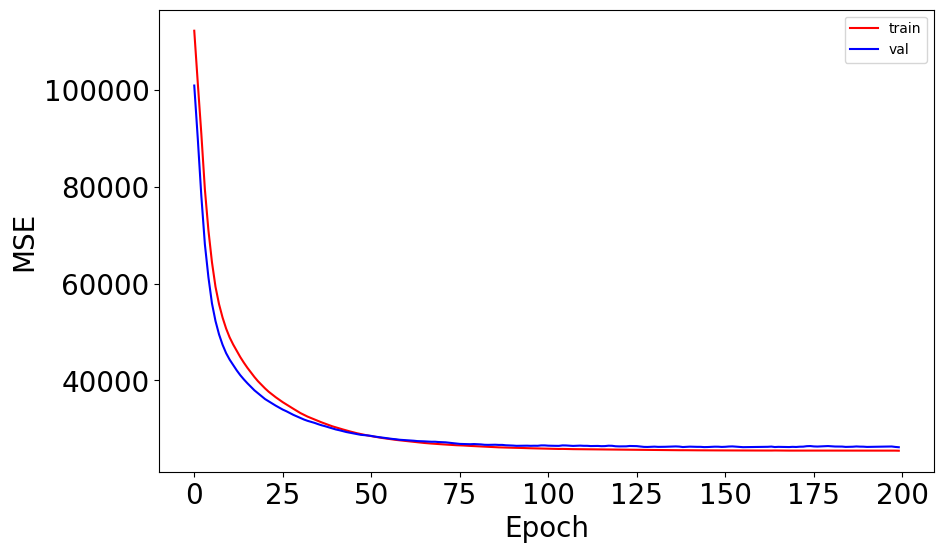

In [45]:
# Graficar el mse
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

4/4 [==============================] - 0s 1ms/step


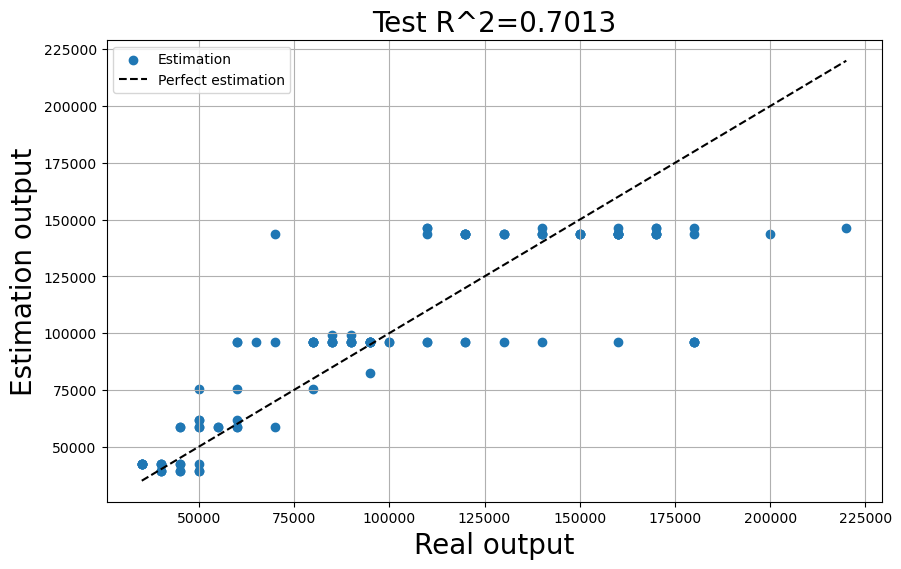

In [46]:
#Predicción  y calcular R2
yhat = model.predict(X_test)

R2_score = r2_score(y_test,yhat)

xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

# ÁRBOL DE DECISIÓN

In [47]:
#Inicializar el modelo
model_tree = DecisionTreeRegressor(random_state = 0)
# entrenar el modelo 
model_tree.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [48]:
# Prediciendo en los datos de prueba
y_pred = model_tree.predict(X_test)

In [49]:
# calcular el error cuadrático medio
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("\nMSE: ", mse)


MSE:  233181818.182


In [50]:
#calcular la r2
r2 = r2_score(y_test, y_pred)
print("\nR2: ", r2)


R2:  0.8984934105260696


In [51]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error' #usamos el error cuadrático medio como medida de performance
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

#entreno el modelo
gs.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

In [52]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 10}


In [53]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=10)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.9344461578981601
MAE Train 7849.749542396601
MSE Train 142035502.1847418


# RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestRegressor

#Inicializo modelo
model_rf = RandomForestRegressor(min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model_rf,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10), #mínimo numero de observaciones
                                'n_estimators': [100, 300, 500, 800] #número de árboles
                                }, 
                  cv=kfold,
                  scoring='neg_mean_squared_error',
                  verbose=0)

#Entreno el modelo
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10),
                         'n_estimators': [100, 300, 500, 800]},
             scoring='neg_mean_squared_error')

In [55]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}


In [56]:
#crear nuevo modelo usando los parámetros óptimos que obtuvimos
new_model_RF = RandomForestRegressor(n_estimators=500,#número de árboles
#                               criterion='squared_error',
                               max_depth=8,
                               min_samples_split=10,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

R2 train 0.9529639384085618
MAE Train 6856.354694041222
MSE Train 106750699.89743644


In [57]:
#crear nuevos datos
X_new  = pd.DataFrame([[32.0,1.0,0.0,153.0,5.0,18000.000000,1.0,27.0,0]], columns=['Age', 'Gender', 'Education Level', 
                                                                                 'Job Title', 'Year of experience',
                                                                                'salario anual', 'nivel de experiencia', 'edad de inicio laboral',
                                                                                'Nivel salario'])

X_new

,Age,Gender,Education Level,Job Title,Year of experience,salario anual,nivel de experiencia,edad de inicio laboral,Nivel salario
0,32.0,1.0,0.0,153.0,5.0,18000.0,1.0,27.0,0


In [58]:
#Predicciones con datos escalados
X_new_scaled = scaler.fit_transform(X_new)
ynew = new_model_RF.predict(X_new_scaled)

In [60]:
print('el salario sería', ynew)

el salario sería [94374.3565349]
